# Bringing in the Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import statsmodels.api as sm

In [5]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [6]:
from subprocess import check_output

# Reading the Data

In [7]:
hra = pd.read_csv('./Human Resources Analytics.csv')
hra.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
columns_names=hra.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [9]:
hra.shape

(14999, 10)

In [10]:
hra.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# Summarizing the Data

In [11]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
sns.set_style('whitegrid')

# Checking for the Null Values

In [13]:
hra.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


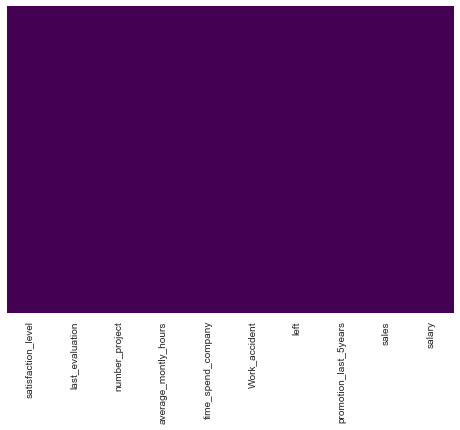

In [14]:
sns.heatmap(hra.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Based on the information that is given with the Human Resources Analytics Dataset, there is no null values involved in the dataset. 

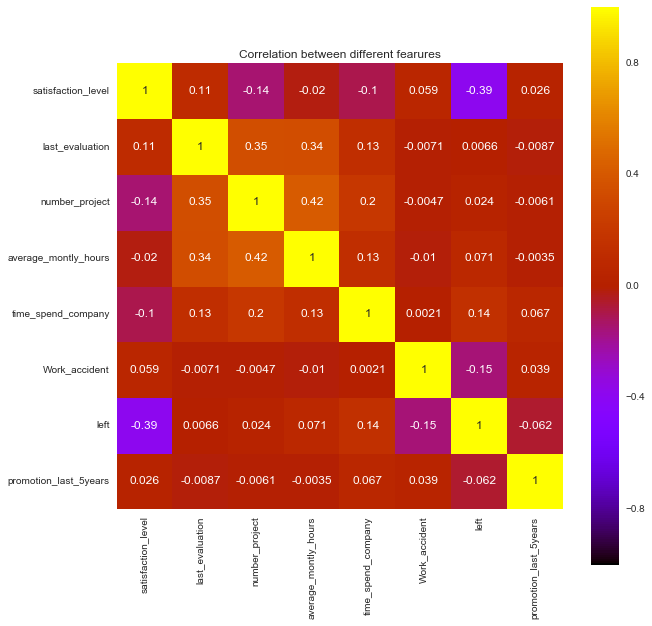

In [15]:
correlation = hra.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='gnuplot')

plt.title('Correlation between different fearures')

# Visualization of Sales

In [16]:
hra['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [17]:
sales=hra.groupby('sales').sum()
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [18]:
groupby_sales=hra.groupby('sales').mean()
groupby_sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [19]:
IT=groupby_sales['satisfaction_level'].IT
RandD=groupby_sales['satisfaction_level'].RandD
accounting=groupby_sales['satisfaction_level'].accounting
hr=groupby_sales['satisfaction_level'].hr
management=groupby_sales['satisfaction_level'].management
marketing=groupby_sales['satisfaction_level'].marketing
product_mng=groupby_sales['satisfaction_level'].product_mng
sales=groupby_sales['satisfaction_level'].sales
support=groupby_sales['satisfaction_level'].support
technical=groupby_sales['satisfaction_level'].technical
technical

0.60789705882352951

# Plotting the Datasets

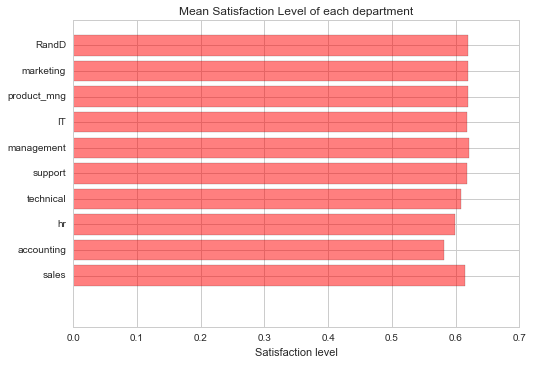

In [20]:
department_name=('sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD')
department=(sales, accounting, hr, technical, support, management,
       IT, product_mng, marketing, RandD)
y_pos = np.arange(len(department))
x=np.arange(0,1,0.1)

plt.barh(y_pos, department, align='center', alpha=0.5,color='red')
plt.yticks(y_pos,department_name )
plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each department')

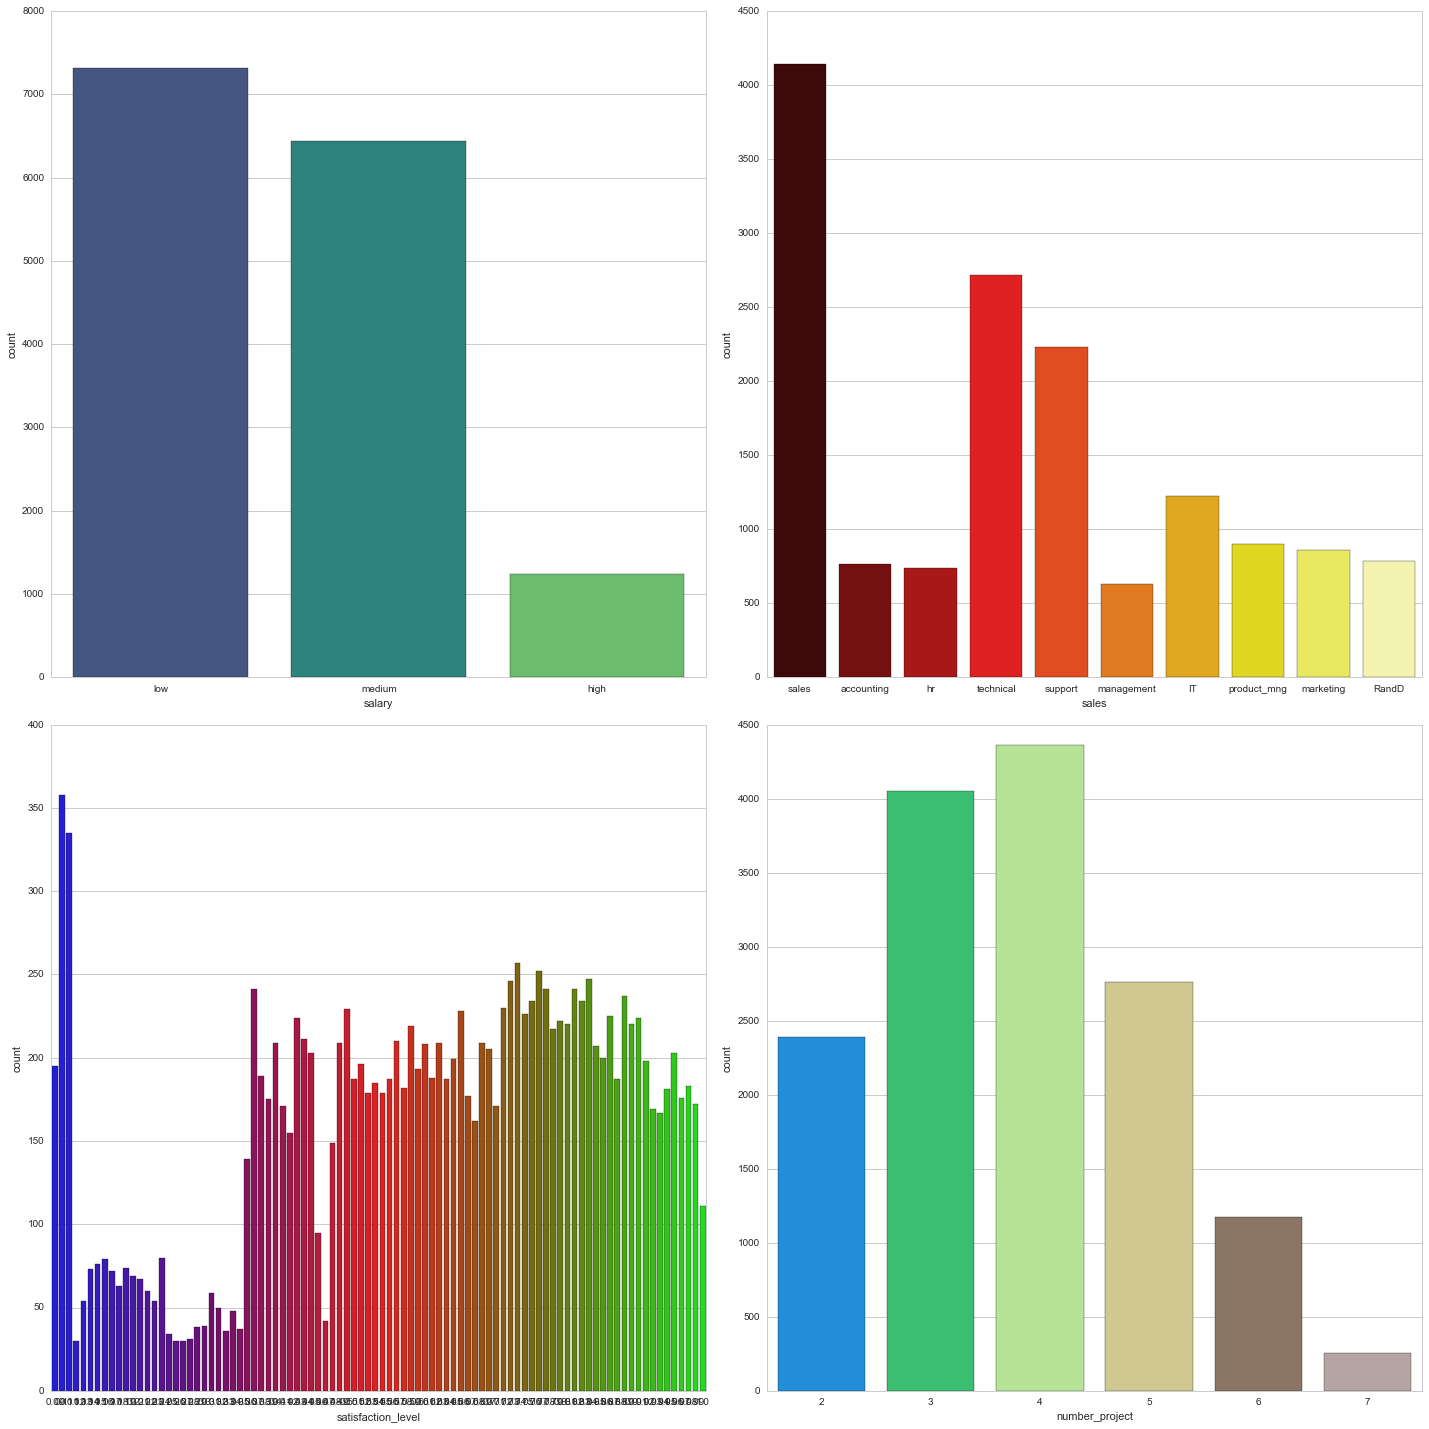

In [21]:
fig, axarr  = plt.subplots(2,2,figsize=(20,20))
sns.countplot(x='salary', data=hra, ax=axarr[0,0],palette='viridis')
sns.countplot(x='sales', data=hra, ax=axarr[0,1],palette='hot')
sns.countplot(x='satisfaction_level', data=hra, ax=axarr[1,0],palette='brg')
sns.countplot(x='number_project', data=hra, ax=axarr[1,1],palette='terrain')
plt.tight_layout()

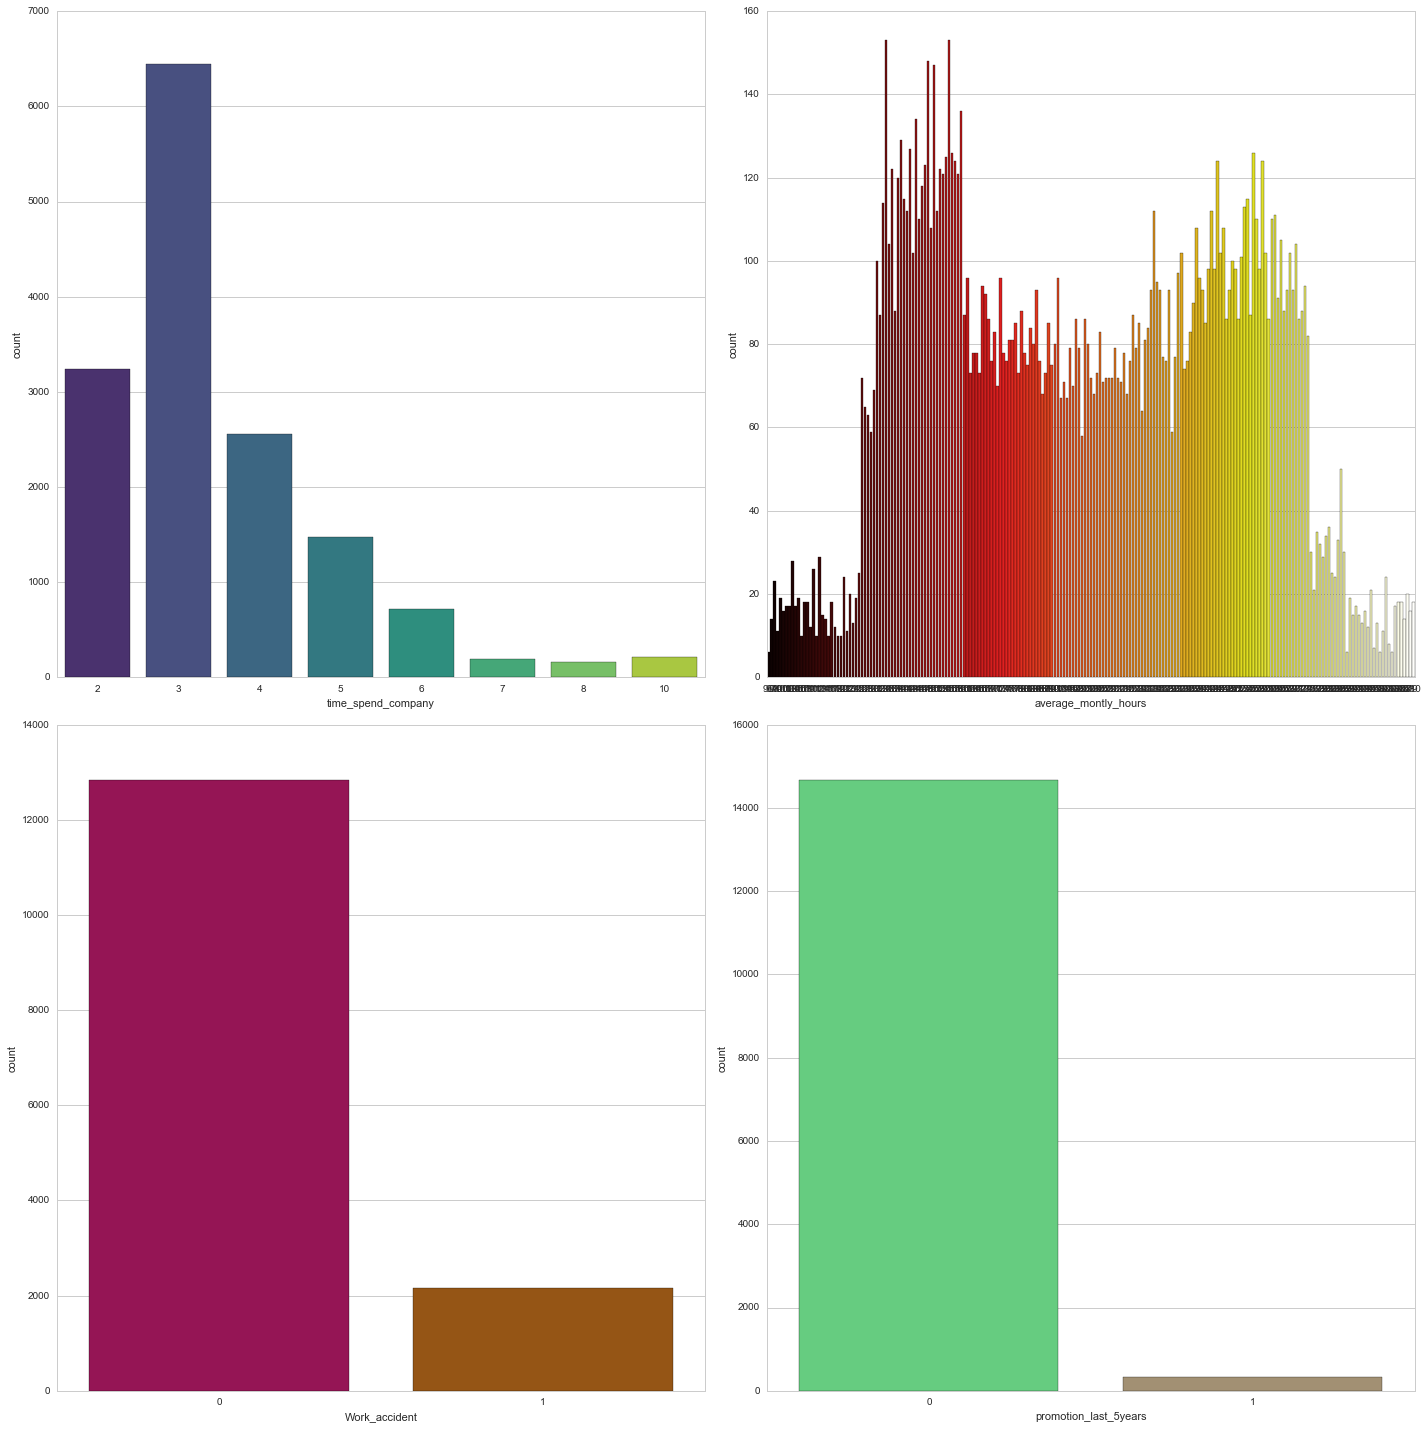

In [22]:
fig, axarr  = plt.subplots(2,2,figsize=(20,20))
sns.countplot(x='time_spend_company', data=hra, ax=axarr[0,0],palette='viridis')
sns.countplot(x='average_montly_hours', data=hra, ax=axarr[0,1],palette='hot')
sns.countplot(x='Work_accident', data=hra, ax=axarr[1,0],palette='brg')
sns.countplot(x='promotion_last_5years', data=hra, ax=axarr[1,1],palette='terrain')
plt.tight_layout()

# Principal Analysis

In [23]:
hra.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Dropping the Sales and Salary

In [24]:
hra_drop=hra.drop(labels=['sales','salary'],axis=1)
hra_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


# Dropping the Tolist Column

In [25]:
cols = hra_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [26]:
cols.insert(0, cols.pop(cols.index('left')))
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

# Converting the List to Columns Again

In [27]:
hra_drop = hra_drop.reindex(columns= cols)

In [28]:
X = hra_drop.iloc[:,1:8].values
y = hra_drop.iloc[:,0].values
X

array([[ 0.38,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.86,  5.  , ...,  6.  ,  0.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  4.  ,  0.  ,  0.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.11,  0.96,  6.  , ...,  4.  ,  0.  ,  0.  ],
       [ 0.37,  0.52,  2.  , ...,  3.  ,  0.  ,  0.  ]])

In [29]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
np.shape(X)

(14999, 7)

In [31]:
np.shape(y)

(14999,)

# Data Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [33]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [34]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


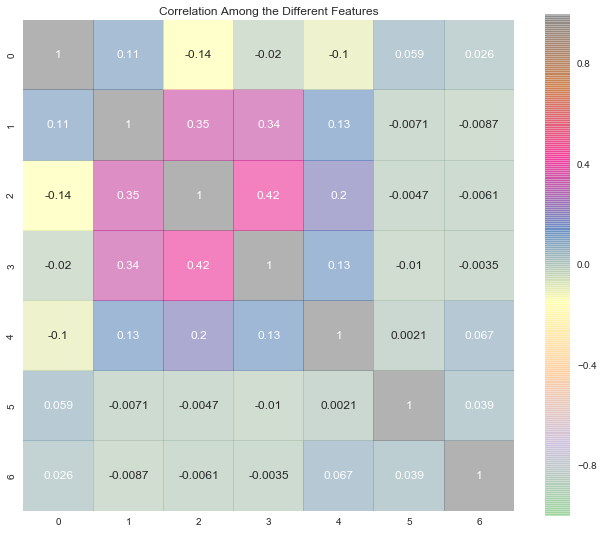

In [35]:
plt.figure(figsize=(11,9))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='Accent',alpha=0.5)

plt.title('Correlation Among the Different Features')

# Eigenvectors

In [36]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[ 1.83017431  0.54823098  0.63363587  0.84548166  1.12659606  0.95598647
  1.06036136]


# Principal Components

In [37]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.83017431388
1.12659606399
1.06036136228
0.955986474007
0.845481663714
0.633635874483
0.548230976542


In [38]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

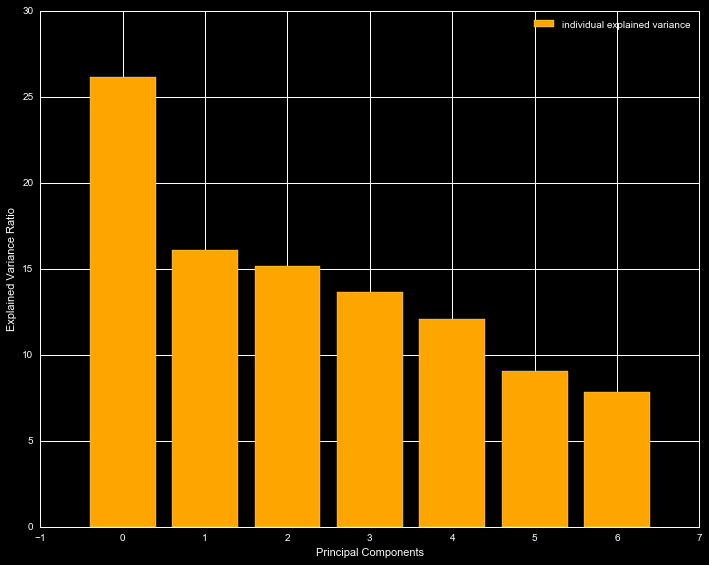

In [39]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(7), var_exp, alpha=1.0, align='center',
            label='individual explained variance',color='orange')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

# Projection Matrix

In [40]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.08797699  0.79752505]
 [-0.50695734  0.33180877]
 [-0.5788351  -0.10338032]
 [-0.54901653  0.10388959]
 [-0.31354922 -0.28404472]
 [ 0.01930249  0.37489883]
 [-0.00996933  0.10557298]]


In [41]:
Y = X_std.dot(matrix_w)
Y

array([[ 1.90035018, -1.12083103],
       [-2.1358322 ,  0.2493369 ],
       [-3.05891625, -1.68312693],
       ..., 
       [ 2.0507165 , -1.182032  ],
       [-2.91418496, -1.42752606],
       [ 1.91543672, -1.17021407]])

# PCA is Scikit Learn

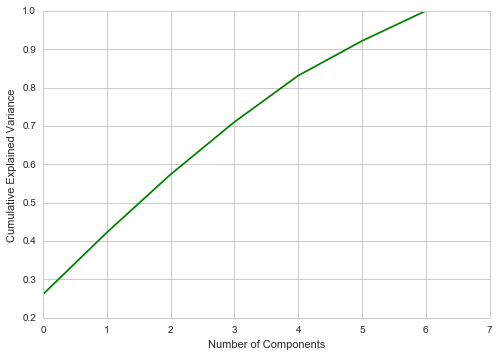

In [42]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='green')
plt.xlim(0,7,1)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [43]:
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [44]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ..., 
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


In [45]:
Y_sklearn.shape

(14999, 6)